# Decision Trees (DT)

## Model Specification

### Regression Trees

Given a partition into $M$ regions, model the response as a constant $c_m$ in each region:

$$f(x)=\sum_{m=1}^M c_mI(x\in R_m)$$

$c_m$ and $R_m$ are solved for in the following ways.

- Under the loss function of least square, $\hat{c}_m=ave(y_i|x_i\in R_m)$. 
- In spliting the regions, one needs to choose the splitting variable $j$ and split point $s$, at each Greedy step minimizing the following

$$\min_{j,s}\left[\min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2 + \min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]$$

The splitting process continues until some minimum node size is met in a region. Then the pruning starts by minimizing the following cost complexity criterion

$$C_{\alpha}(T)=\sum_{m=1}^{|T|}\sum_{x_i\in R_m}(y_i-\hat{c}_m)^2 + \alpha|T|$$

Here $\alpha$ determines the tradeoff between tree size (bias) and goodness-of-fit to the data (variance). One can show that for any given $\alpha\geq0$, there is a unique subtree $T_{\alpha}$ of $T_0$ such that $C_{\alpha}(T)$ is minimized. The idea of **weakest link pruning** is to successively collapse the internal node that produces the smallest per-node increase in $\sum_{m=1}^{|T|}\sum_{x_i\in R_m}(y_i-\hat{c}_m)^2$, and continue until we produce a single-node (root) tree. This gives a (finite) sequence of subtrees and one can show that this sequence must contain $T_{\alpha}$. Estimation of $\alpha$ is done via CV.

### Classification Trees

Class prob for node $m$ for $R_m$ with $N_m$ observations:

$$\hat{p}_{mk}=\frac{1}{N_m}\sum_{x_i\in R_m}I(y_i=k)$$

Observations in node $m$ is classified to class $k(m)=arg\max_k\hat{p}_{mk}$, a majority vote. Three error measures can be defined:
- Misclassification Error: $1-\hat{p}_{mk}$
- Gini Index: $\sum_{k=1}^K\hat{p}_{mk}(1-\hat{p}_{mk})$ (If we classify randomly according to prob $\hat{p}_{mk}$, this is the expected training error)
- Cross-entropy or deviance: $-\sum_{k=1}^K\hat{p}_{mk}\log\hat{p}_{mk}$.

The are certain advantages of the Gini Index and the Cross-entropy:
- Gini index and cross-entropy are differentiable, and hence more amenable to numerical optimization.
- Gini index and cross-entropy are more sensitive to changes in node probabilities than the misclassification rate. As such, both Gini Index and Cross-entropy tend to produce pure nodes.

For the above reasons, either the Gini index or cross-entropy should be used in growing a tree. To guide cost-complexity pruning, any of the three measures can be used, but typically it is the misclassification rate.

### Variants and Generalizations

## Theoretical Properties

### Advantages
- DT are simple to understand and easy to interpret. Intuitive - close to the logical thinking of doctors.
- DT requires little data preparation, such as data normalization, dummy variables creation. DT precedure is also immune to magnitude of features, i.e. a monotonic transform on input does not alter the results in DT.
- It is relatively cheap to do inference, in that the cost of using the tree in inference is roughly [logarithmic](http://scikit-learn.org/stable/modules/tree.html) in the number of data points used to train the tree. That is, assuming a roughly balanced tree, there are $O(\log n_{sample})$ splits.
- Able to handle both numerical and categorical data, i.e. mixed data types.
- Able to handle multiple outputs.

### Disadvantages
- DT typically has lower prediction accuracy, resulting from high variance or instability. One incarnation of the instability is that a small change in the data can result in a very different series of splits, making interpretation somewhat precarious. The main reason for this instability is the hierarchical nature of the process: the effect of an error in the top split is propagated down to all of the splits below it.
- It is a hard optimization problem. Global optimum is almost impossible to achieve - so we will have to make do with Greedy algorithm and local opmitimum. Computation efficiency may also be an issue.
- There are concepts that are hard to learn because DT does not express them easily, such as XOR, parity or multiplexer problems. [(reference needed)](http://scikit-learn.org/stable/modules/tree.html)

### Relation to Other Models
- To account for the high variance and lower prediction accuracy in DT, multiple extensions are proposed; see the notebooks on [bagging](Bagging.ipynb), [boosting](Boosting.ipynb) and [emsemble methods](Emsemble.ipynb). A general theme is, in order to achieve greater prediction accurary, interpretability is to be sacraficed.
- DT, or CART (Classification and Regression Trees) is also related to [Multivariate Adaptive Regression Spline (MARS)](MARS.ipynb). MARS is considered to be better in fitting a smooth surface and capturing additive structure (see Disavantages under Empirical Performance)

## Empirical Performance

### Advantages
- DT is computationally scalable, compared to SVM(svm.ipynb) or neural nets.
- Possible to validate a model using [statistical tests](http://scikit-learn.org/stable/modules/tree.html). That makes it possible to account for the reliability of the model. (Reference needed)
- Performs well even if its [assumptions are somewhat violated by the true model](http://scikit-learn.org/stable/modules/tree.html) from which the data were generated (references needed)
- To some extent, DT is robust to irrelavant inputs.
- DT is robust to outliers in the input space.

### Disavantages
- DT can create biased trees in classificatoin if some classes dominates. See 'Implement Details and Practical Tricks' below for ways to mitigate.
- Lack of Smoothness in the Prediction Surface, especially in the regression setting. Something that [MARS](Multivariate Adaptive Regression Splines.ipynb) can be viewed as alleviating.
- Although it can do it with sufficient data, DT makes no special encouragement to find structure such as $Y=c_1I(X_1<t_1)+c_2I(X_2>t_2)$. This is something that [MARS](Multivariate Adaptive Regression Splines.ipynb) can be viewed as alleviating.
- This may not be a disadvantage of DT per se. But it is non trivial to handle missing data, except to treat them as another category.
- DT with many features tend to overfit (it is not unusual to see close to $0\%$ mis-classification, for instance). Condiering only a limited number of features may help; see `max_feature` in sklearn below. Pruning will help mitigate this.

## Implementation Details and Practical Tricks

**Classification Tree in sklearn**

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
# Training
clf = tree.DecisionTreeClassifier(criterion='gini', 
                                  splitter='best', 
                                  max_depth=None, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  max_features=None, 
                                  random_state=None, 
                                  max_leaf_nodes=None, 
                                  class_weight=None,
                                  presort=False)
clf = clf.fit(iris.data, iris.target, sample_weight=None)

The usage of the inputs in `DecisionTreeClassifier` should be self-evident by name, except for a few below:

- **`min_weight_fraction_leaf`**: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- **`class weight`**: Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of `y`.

- **`max_features`**: The number of features to consider when looking for the best split:

 - If int, then consider `max_features` features at each split.
 - If float, then `max_features` is a percentage and `int(max_features * n_features)` features are considered at each split.
 - If “auto”, then `max_features=sqrt(n_features)`.
 - If “sqrt”, then `max_features=sqrt(n_features)`.
 - If “log2”, then `max_features=log2(n_features)`.
 - If None, then `max_features=n_features`.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- **`presort`**: Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training

For the `fit` function

- **sample_weight**: array-like, shape = [n_samples] or None. Sample weights. If None, then samples are equally weighted. Splits that would create child nodes with net zero or negative weight are ignored while searching for a split in each node.

Notes for using `DecisionTreeClassifier`:

**The features are always randomly permuted at each split**. Therefore, the best found split may vary, even with the same training data and `max_features=n_features`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [2]:
# Inference - classification
clf.predict([[2., 2., 0, 1]])

array([1])

In [3]:
# Inference - class probs
clf.predict_proba([[2., 2., 0, 1]])

array([[ 0.,  1.,  0.]])

In [4]:
# Score method returns the mean prediction accurary, for test data.
clf.score([[2., 2., 0, 1]], [0], sample_weight=None)

0.0

**Regression Tree in sklearn**

In [5]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
# Training and prediction
# Inputs for this class and fit seem the same as the regression tree counterpart.
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y, sample_weight=None)

In [6]:
clf.predict([[1, 1]])

array([ 0.5])

In [7]:
# Score method returns the coefficient of determination R^2 of the prediction, for test data.
clf.score([[1., 1.]], [1], sample_weight=None)

0.0

**Multi-output problems**

This is when output `Y` is multi-dimensional, and it sometimes requires to build a single model capable of predicting simultaneously all n outputs. With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

 - Store n output values in leaves, instead of 1;
 - Use splitting criteria that compute the average reduction across all n outputs.

The module `tree` in sklearn offers support for multi-output problems in both `DecisionTreeClassifier` and `DecisionTreeRegressor`. If a decision tree is fit on an output array `Y` of size `[n_samples, n_outputs]` then the resulting estimator will:

 - Output `n_output` values upon predict;
 - Output a list of `n_output` arrays of class probabilities upon `predict_proba`.

**Dealing with Dominant Class**

Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (`sample_weight`) for each class to the same value. Also note that weight-based pre-pruning criteria, such as `min_weight_fraction_leaf`, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like `min_samples_leaf`.

If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

**Pruning**

**There are no built-in systematic pruning in sklearn**. The way to perform pruning is to fiddle the parameters controlling the size of the trees. The default values for these parameters lead to fully grown and unpruned trees which can potentially be very large on some data sets. 

- Use `max_depth` to control the size of the tree to prevent overfitting.
- Use `min_samples_split` or `min_samples_leaf` to control the number of samples at a leaf node. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try `min_samples_leaf=5` as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. The main difference between the two is that `min_samples_leaf` guarantees a minimum number of samples in a leaf, while `min_samples_split` can create arbitrary small leaves, though min_samples_split is more common in the literature.
- If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as `min_weight_fraction_leaf`, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.


**Sparcity Optimization in sklearn**

If the input matrix X is very sparse, it is recommended to convert to sparse `csc_matrix` before calling fit and sparse `csr_matri`x before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

**Complexity**

In a naive implementation without presorting samples according to each feature, at each split we need to go through $n_features$ features to choose the feature to split, and for each feature, sort $n_samples$ to find the split point. Thus each split takes $O(n_feature*n_sample*\log(n_sample))$. The whole training phase takes $O(n_feature*n_sample^2*\log(n_sample))$.

Presorting the feature over all relevant samples, and retaining a running label count, will reduce the complexity at each node to $O(n_{features}\log(n_{samples}))$, which results in a total cost of $O(n_{features}n_{samples}\log(n_{samples}))$. This is an option for all tree based algorithms; see `presort` in the class input. By default it is turned on for gradient boosting, where in general it makes training faster, but turned off for all other algorithms as it tends to slow down training when training deep trees (recall that boosting usually work with shallow trees).


**Splitting Categorical Predictors** 

When splitting a predictor having $q$ possible unordered values, there are $2^{q-1}-1$ possible partitions into two groups, which may be computational daunting. One trick is that we can order the predictor classes according to the proportion falling in outcome class 1, and then this predictor is splitted as if it were an ordered predictor. One can show that this gives the optimal split, in terms of cross-entropy or Gini index. For regression problem it can follow the same token and order by increasing mean of the outcome. Although intuitive, the proofs of these assertions are not trivial.

One problem is the partitioning algorithm tends to favor categorical predictors with many levels $q$. This can lead to severe overfitting if $q$ is large, and such variables should be avoided.

**The Loss Matrix**

In classification problems, there are cases where misclassifications of certain classes are more catastrophic, or when there are imbalance of class instances. **One approach** to mitigate this is to scale the loss function by a disproportionate loss. For instance, rewrite Gini index as $\sum_{k\neq k'}L_{kk'}\hat{p}_{mk}\hat{p}_{mk'}$. But it does not work in two-class if $L_{kk'}=L_{k'k}$. Implemented through `class_weight` in sklearn (to confirm). **Another approach** is to weigh on the observations. The effect of observation weighting is to alter the prior probability on the classes. In the terminal node, the empirical Bayes rule implies that we classify to class $k(m)=arg\min_k\sum_l L_{lk}\hat{p}_{mk}$. This is done by `sample_weight` in sklearn.

**Missing Predictor Values**

Two tricks. (1) **If missing data is on a categorical variable, just make a new category of 'missing'** - we may find pattern or even reasons why these values are missing. (2) Look for **surrogate variable**. First train the trees using only non-missing-valued observations. Next find surrogate variables, which is predictor and corresponding split point that best mimics the split of the training data achieved by the primary split (not much details on ESL; more reference needed). At last, when doing inference, use surrogate splits in order (do not imagine that we can do this during training, despite what ESL says). Note that by nature of DT, surrogate variables can only be used one by one, i.e. we cannot use, say, a linear combination of variables.

**Why only Binary Splits**

Because multiway splits fragment the data too quickly, leaving insufficient data at the next level down.

**Linear Combination Splits**

Using a linear combination split $\sum a_jX_j \leq s$, while perhaps improving on the predictor power, hurts the interpretability.

## Use Cases

## Results Interpretation, Metrics and Visualization

You can use the `graphviz` module to visualize the tree.

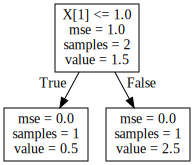

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

(Aren't there viz of trees which take into account loss reduction?)

## References

- ESL, Section 9.2
- [scikit-learn Document 1.10](http://scikit-learn.org/stable/modules/tree.html)

### Further Reading
- Breiman, L., Friedman, J. Olshen, R. and Stone, C. (1984) Classification and Regression Trees, Wadsworth, New York.
- Ripley, B.D. (1996) Pattern Recognition and Neural Networks, Cambridge University Press.

## Misc.